In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os

In [309]:
import pandas as pd
import numpy as np
import pickle
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [3]:
# /Users/wani/Desktop/
file_path = './datasets/'

In [4]:
'''

1. 데이터 셋 -> 전처리 과정
* 과연 이상치 제거 해야하는가? -> EDA 분석에서 놓쳤던 점들을 판단해보자!
    ** INSP 분포 / 각 컬럼별 분포가 어떻게 되어있는지 파악하기 / EDA 분석 ->  분포별 구획을 정해서 해당 내 있는 데이터 셋 확인
2. 가능하다면, 시간별로 데이터가 어떻게 구성되어 있는지, //
3. 전처리 scaler mixmin / z-score로 할것인지 판단하기 
'''

'\n\n1. 데이터 셋 -> 전처리 과정\n* 과연 이상치 제거 해야하는가? -> EDA 분석에서 놓쳤던 점들을 판단해보자!\n    ** INSP 분포 / 각 컬럼별 분포가 어떻게 되어있는지 파악하기 / EDA 분석 ->  분포별 구획을 정해서 해당 내 있는 데이터 셋 확인\n2. 가능하다면, 시간별로 데이터가 어떻게 구성되어 있는지, //\n3. 전처리 scaler mixmin / z-score로 할것인지 판단하기 \n'

In [38]:
dissoultion = pd.read_csv(file_path + 'dissolution_tank.csv', encoding='cp949')
dissoultion

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [39]:
dissoul = dissoultion.copy()
dissoul

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [40]:
dissoultion.corr(method='pearson') 

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
NUM,1.000000,0.000188,-0.000050,0.080079,-0.000524
MELT_TEMP,0.000188,1.000000,0.944929,-0.000336,0.916295
MOTORSPEED,-0.000050,0.944929,1.000000,0.000123,0.887813
MELT_WEIGHT,0.080079,-0.000336,0.000123,1.000000,-0.000005
INSP,-0.000524,0.916295,0.887813,-0.000005,1.000000


In [41]:

dissoul = dissoul.replace('OK', 0) # 정상 OK 0, 불량 NG 1 //
dissoul = dissoul.replace('NG', 1)
dissoul # 시간별 데이터 구성 살펴볼까요? EDA 

# 데이터 라벨링 ex) NG, OK  -> 1(N), 0(OK)


,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,0
1,2020-03-04 0:00,1,433,78,609,3.19,0
2,2020-03-04 0:00,2,464,154,608,3.19,0
3,2020-03-04 0:00,3,379,212,606,3.19,0
4,2020-03-04 0:00,4,798,1736,604,3.21,0
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,0
835196,2020-04-30 23:59,835196,385,206,317,3.19,0
835197,2020-04-30 23:59,835197,465,148,316,3.20,0
835198,2020-04-30 23:59,835198,467,0,314,3.19,0


In [42]:
OK_dissoul = dissoul[dissoul['TAG'] == 0] #정상 
NG_dissoul = dissoul[dissoul['TAG'] == 1] #비정상
# 3.04 0:00 - 4.30 23:59 기간 

In [10]:
#dissoul.query('"0:00"<= STD_DT <= "0:59"')
len(dissoul[dissoul['STD_DT'].str.contains('2020-03-04 0:02')]) # 1분마다 10개의 데이터 씩 존재함
# 10개의 데이터가 있지만, curving shift를 지나면서 1개를 빼고 9개만 처리 해주면 된다라고 판단함.
# 우리는 고민해봐야하는게 10개씩 끊어 있기 때문에 10개씩 묶어서 학습을 시겨야 함 / 그리고 다음 step에 넘어갈 때, 1시간 뒤의 데이터를 예측한다면 60임
# 앞서 데이터 학습 시킬 때 / OK, NG만 부분적으로 나누고 학습을 시켜서 이상적인 데이터만 가지고 학습을 한다고 해서 
# 제대로 학습되지 않아 문제가 생김 - 정확도는 높아져도,  prediction 정반대로 이루어짐 
# case 1. 1분단위 10개씩 묶어서 학습을 시키고 (이상 / 정상 데이터 고려하지 않음) case2. 정상 데이터만 / 비정상 나누어 데이터 학습 
# case 3. 1분마다 단위의 정상 데이터를 가지고 학습하기 (컬)

# 1분위로 나누어져 있는 1분 전에, 예측을 할려면  10개 데이터 먼저 예측해야함 ( 만약 1시간 전 데이터를 예측하려면 1*60 = 60분 )
# curving shift로 먼저 예측 후 / 본래 NG 데이터 제거 

# 1초당 9개 데이터 안 OK / NG 몇 개 있는지 판단하기 
# 3/04 ~ 3/16 까지 , 4/15 ~ 4/30까지를 제외할 것인가? 분석을 어떻게 하냐에 따라 다를 것임...
# 60*24 = 1440 / 1 day 단위로 된다면 우리는 15일을 예측해서 고장을 판단해야 하지 않을까?


10

In [460]:
# 데이터ㅏ 프레임 평균, 분산, 표준편차 공정능력 게산 - 평균 mean 분산 var 표준편차 std
# min max

dissoul[dissoul.columns[2]].var()

16455.121921450314

In [461]:
dissoul

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,0
1,2020-03-04 0:00,1,433,78,609,3.19,0
2,2020-03-04 0:00,2,464,154,608,3.19,0
3,2020-03-04 0:00,3,379,212,606,3.19,0
4,2020-03-04 0:00,4,798,1736,604,3.21,0
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,0
835196,2020-04-30 23:59,835196,385,206,317,3.19,0
835197,2020-04-30 23:59,835197,465,148,316,3.20,0
835198,2020-04-30 23:59,835198,467,0,314,3.19,0


In [ ]:
'''
CP = 규격상한 - 규격하한 / 6*표준편차
CPk = 규격상한 - 평균 / 3*표준편차
'''

In [467]:
print(dissoul[dissoul.columns[4]].var()) #무게 컬럼
print(dissoul[dissoul.columns[4]].max())
print(dissoul[dissoul.columns[4]].min())
print(dissoul[dissoul.columns[4]].median())
print(dissoul[dissoul.columns[4]].std())
print(dissoul[dissoul.columns[4]].mean())


1482560.5542209772
55252
0
383.0
1217.6044325728192
582.9621252394636


In [470]:
# 예를 들어서 , 상ㅎ한 median
cp =( dissoul[dissoul.columns[4]].mean() - dissoul[dissoul.columns[4]].median() ) / (6*dissoul[dissoul.columns[4]].std())
cp

0.027370975319811676

In [471]:
cpk = ( 690 - dissoul[dissoul.columns[4]].mean() ) / (3*dissoul[dissoul.columns[4]].std())
cpk

0.029302859477486055

In [ ]:
# 
def CP_cal(data)


In [ ]:
# 만약 샘플림한 그룹별로 공정 분석을 진행한다면? - 

In [11]:
# 데이터 날짜별로 검색하기 ---

def datatimeFind(data, target):
    #
    time = input("검색할 날짜를 입력해주세요: ")
    
    find = data[data[target].str.contains(time)]
    
    return find


In [12]:
datatimeFind(dissoul, 'STD_DT')


검색할 날짜를 입력해주세요: 2020-03-04 0:02


,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
20,2020-03-04 0:02,20,474,135,581,3.19,0
21,2020-03-04 0:02,21,446,67,580,3.19,0
22,2020-03-04 0:02,22,487,161,578,3.20,0
23,2020-03-04 0:02,23,393,205,577,3.18,0
24,2020-03-04 0:02,24,740,1748,575,3.22,0
25,2020-03-04 0:02,25,761,1721,574,3.22,0
26,2020-03-04 0:02,26,383,200,572,3.18,0
27,2020-03-04 0:02,27,483,167,571,3.19,0
28,2020-03-04 0:02,28,435,90,570,3.18,0
29,2020-03-04 0:02,29,456,111,568,3.19,0


In [13]:
 #이번에는 시간 1초당 버프를 하나씩 가져가도록 하기...
# 1초당 어떠한  feature extraction을 가지고 있는지 판단하기 위해서는 벡터 변환이 필요하다 / 먼저 각 초당

# 각 1초당 10개의 데이터 평균을 내고 그에 따른 평균 이상의 값들만 추출할 수 도 있고, 
# 구간별로 조건을 주어서 구분


In [14]:
# 검색하여 원하는 날짜만 뽑아내기 
def getselectData10(data, column, time):
    selData = data.loc[[0]]
    l_sel = data[data[column].str.contains(time)]
    l_sel = l_sel[(l_sel[l_sel.columns[2]]>=l_sel[l_sel.columns[2]].mean()) & 
                  (l_sel[l_sel.columns[3]]>=l_sel[l_sel.columns[3]].mean()) & 
                  (l_sel[l_sel.columns[4]]>=l_sel[l_sel.columns[4]].mean()) & 
                  (l_sel[l_sel.columns[5]]>=l_sel[l_sel.columns[5]].mean())]
    selData = selData.append(l_sel, ignore_index = True)
    selData = selData.drop(0)
    return selData

In [476]:

getselectData10(dissoul, 'STD_DT', '2020-03-04 15:07')


,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
1,2020-03-04 15:07,9074,745,1777,275,3.22,0
2,2020-03-04 15:07,9075,741,1736,274,3.21,0


In [16]:
dissoul.dtypes

STD_DT          object
NUM              int64
MELT_TEMP        int64
MOTORSPEED       int64
MELT_WEIGHT      int64
INSP           float64
TAG              int64
dtype: object

In [18]:
# 모든 시간 데이터 리스트로 저장 
def timegetList(data, target):
    time_list = []
    
    for i in data[target]:
        #print("========"+i+"====")
        if i not in time_list:
            time_list.append(i)
    print("===추출 완료===")
    return time_list
# 1분 마다 10개씩 데이터가 있음

In [19]:
t = timegetList(dissoul, 'STD_DT')
t

===추출 완료===


['2020-03-04 0:00',
 '2020-03-04 0:01',
 '2020-03-04 0:02',
 '2020-03-04 0:03',
 '2020-03-04 0:04',
 '2020-03-04 0:05',
 '2020-03-04 0:06',
 '2020-03-04 0:07',
 '2020-03-04 0:08',
 '2020-03-04 0:09',
 '2020-03-04 0:10',
 '2020-03-04 0:11',
 '2020-03-04 0:12',
 '2020-03-04 0:13',
 '2020-03-04 0:14',
 '2020-03-04 0:15',
 '2020-03-04 0:16',
 '2020-03-04 0:17',
 '2020-03-04 0:18',
 '2020-03-04 0:19',
 '2020-03-04 0:20',
 '2020-03-04 0:21',
 '2020-03-04 0:22',
 '2020-03-04 0:23',
 '2020-03-04 0:24',
 '2020-03-04 0:25',
 '2020-03-04 0:26',
 '2020-03-04 0:27',
 '2020-03-04 0:28',
 '2020-03-04 0:29',
 '2020-03-04 0:30',
 '2020-03-04 0:31',
 '2020-03-04 0:32',
 '2020-03-04 0:33',
 '2020-03-04 0:34',
 '2020-03-04 0:35',
 '2020-03-04 0:36',
 '2020-03-04 0:37',
 '2020-03-04 0:38',
 '2020-03-04 0:39',
 '2020-03-04 0:40',
 '2020-03-04 0:41',
 '2020-03-04 0:42',
 '2020-03-04 0:43',
 '2020-03-04 0:44',
 '2020-03-04 0:45',
 '2020-03-04 0:46',
 '2020-03-04 0:47',
 '2020-03-04 0:48',
 '2020-03-04 0:49',


In [ ]:

# 10개의 데이터 1분당 실피기 위해 각 전  # 평균보다 높은 데이터를 뽑을 수 있음
def getRemainTimeData10(data, column):
    ddf = data.loc[[0]]
    d = data.loc[[0]]
    #t = timegetList(dissoul, 'STD_DT')
    for i in t:
        l = data[data[column].str.contains(i)]
        l = l[(l[l.columns[2]]>=l[l.columns[2]].mean()) & (l[l.columns[3]]>=l[l.columns[3]].mean()) 
          & (l[l.columns[4]]>=l[l.columns[4]].mean()) & (l[l.columns[5]]>=l[l.columns[5]].mean())]
        
        # 만약 조건에 만족하는 데이터가 1개의 행도 없다면 평균값을 처리...
        if len(l) == 0:
            s = data[data[column].str.contains(i)]
            s = [i, 1, s[s.columns[2]].mean(), s[s.columns[3]].mean(),
                 s[s.columns[4]].mean(), round(s[s.columns[5]].mean(), 2), 0]
            s = pd.DataFrame(data = np.array(s))
            s = s.transpose()
            s.columns = l.columns
            d = d.append(s, ignore_index =True)
        
        print('========= '+i+' 작업 중... =========')
    d = d.drop(0)
    return d
# 수정

In [21]:
newdata = pd.read_csv('datameansample.csv', encoding='cp949')
newdata

,Unnamed: 0,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,1,2020-03-04 0:01,14,740,1740,590,3.22,0
1,2,2020-03-04 0:02,24,740,1748,575,3.22,0
2,3,2020-03-04 0:03,34,759,1718,560,3.21,0
3,4,2020-03-04 0:04,44,757,1737,546,3.22,0
4,5,2020-03-04 0:05,54,797,1739,531,3.21,0
...,...,...,...,...,...,...,...,...
76313,76314,2020-04-30 23:54,835144,784,1751,387,3.22,0
76314,76315,2020-04-30 23:55,835154,740,1748,373,3.22,0
76315,76316,2020-04-30 23:57,835174,728,1737,344,3.21,0
76316,76317,2020-04-30 23:58,835184,755,1715,330,3.22,0


In [30]:
newsdata = newdata.copy()

In [31]:
newsdata = newsdata.drop('Unnamed: 0',  axis=1)
newsdata

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:01,14,740,1740,590,3.22,0
1,2020-03-04 0:02,24,740,1748,575,3.22,0
2,2020-03-04 0:03,34,759,1718,560,3.21,0
3,2020-03-04 0:04,44,757,1737,546,3.22,0
4,2020-03-04 0:05,54,797,1739,531,3.21,0
...,...,...,...,...,...,...,...
76313,2020-04-30 23:54,835144,784,1751,387,3.22,0
76314,2020-04-30 23:55,835154,740,1748,373,3.22,0
76315,2020-04-30 23:57,835174,728,1737,344,3.21,0
76316,2020-04-30 23:58,835184,755,1715,330,3.22,0


In [472]:
newsdata

,TAGtemp,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,0.0,2020-03-04 0:01,14,740,1740,590,3.22,0
1,0.0,2020-03-04 0:02,24,740,1748,575,3.22,0
2,0.0,2020-03-04 0:03,34,759,1718,560,3.21,0
3,0.0,2020-03-04 0:04,44,757,1737,546,3.22,0
4,0.0,2020-03-04 0:05,54,797,1739,531,3.21,0
...,...,...,...,...,...,...,...,...
76313,0.0,2020-04-30 23:54,835144,784,1751,387,3.22,0
76314,0.0,2020-04-30 23:55,835154,740,1748,373,3.22,0
76315,0.0,2020-04-30 23:57,835174,728,1737,344,3.21,0
76316,0.0,2020-04-30 23:58,835184,755,1715,330,3.22,0


In [473]:
# # 비율을 살펴보자 - 원래 데이터 정상 / 비정상의 비율과 샘플 추출을 통한 전처리 후 데이터 비율은?? (알)
def ratioNormalData(data, target):
    # 정상 0
    normal = len(data[data[target] == 0])
    # 비정상 1
    abnormal = len(data[data[target] == 1])
    # 
    normal_ratio = (normal/(normal+abnormal))
    abnormal_ratio = (abnormal/(normal+abnormal))
    
    return normal_ratio, abnormal_ratio



In [475]:
# 각 컬럼(열)별로 평균치 이상으로 추출 
ratioNormalData(newdata, 'TAG') 

(1.0, 0.0)

In [52]:
newdata[newdata['TAG'] == 1]

,Unnamed: 0,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG


In [66]:
dissoulsample = pd.read_csv('dissoulsample.csv', encoding='cp949')
dissoulsample

,Unnamed: 0,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,0,2020.3.4 0:00,0,489,116,631,3.19,0
1,1,2020.3.4 0:01,10,507,128,596,3.19,0
2,2,2020.3.4 0:02,20,474,135,581,3.19,0
3,3,2020.3.4 0:03,30,437,129,567,3.19,0
4,4,2020.3.4 0:04,40,450,145,552,3.19,0
...,...,...,...,...,...,...,...,...
83515,83515,2020.4.30 23:55,835150,470,136,379,3.19,0
83516,83516,2020.4.30 23:56,835160,496,103,362,3.20,0
83517,83517,2020.4.30 23:57,835170,465,108,348,3.19,0
83518,83518,2020.4.30 23:58,835180,498,133,335,3.19,0


In [67]:
dis_sample = dissoulsample.copy()
dis_sample

,Unnamed: 0,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,0,2020.3.4 0:00,0,489,116,631,3.19,0
1,1,2020.3.4 0:01,10,507,128,596,3.19,0
2,2,2020.3.4 0:02,20,474,135,581,3.19,0
3,3,2020.3.4 0:03,30,437,129,567,3.19,0
4,4,2020.3.4 0:04,40,450,145,552,3.19,0
...,...,...,...,...,...,...,...,...
83515,83515,2020.4.30 23:55,835150,470,136,379,3.19,0
83516,83516,2020.4.30 23:56,835160,496,103,362,3.20,0
83517,83517,2020.4.30 23:57,835170,465,108,348,3.19,0
83518,83518,2020.4.30 23:58,835180,498,133,335,3.19,0


In [68]:
dis_sample[dis_sample['TAG'] == 1]


,Unnamed: 0,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
21791,21791,2020.3.19 3:11,217910,414,124,367,3.20,1
22201,22201,2020.3.19 10:01,222010,453,135,180,3.19,1
22289,22289,2020.3.19 11:29,222890,452,129,1621,3.20,1
22292,22292,2020.3.19 11:32,222920,449,112,1579,3.19,1
22316,22316,2020.3.19 11:56,223160,455,117,1250,3.19,1
...,...,...,...,...,...,...,...,...
59803,59803,2020.4.14 12:43,598030,452,120,340,3.19,1
59814,59814,2020.4.14 12:54,598140,457,108,175,3.19,1
59823,59823,2020.4.14 13:03,598230,450,120,38,3.20,1
59825,59825,2020.4.14 13:05,598250,458,113,11,3.19,1


In [69]:
dis_sample = dis_sample.drop('Unnamed: 0',  axis=1)
dis_sample

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020.3.4 0:00,0,489,116,631,3.19,0
1,2020.3.4 0:01,10,507,128,596,3.19,0
2,2020.3.4 0:02,20,474,135,581,3.19,0
3,2020.3.4 0:03,30,437,129,567,3.19,0
4,2020.3.4 0:04,40,450,145,552,3.19,0
...,...,...,...,...,...,...,...
83515,2020.4.30 23:55,835150,470,136,379,3.19,0
83516,2020.4.30 23:56,835160,496,103,362,3.20,0
83517,2020.4.30 23:57,835170,465,108,348,3.19,0
83518,2020.4.30 23:58,835180,498,133,335,3.19,0


In [70]:
sign = lambda x: (1, -1)[x < 0]

def curve_shift(data, target, shiftby):
    vector = data[target].copy()
    
    for i in range(abs(shiftby)):
        temp = vector.shift(sign(shiftby))
        temp = temp.fillna(0)
        vector += temp
    
    label = target
    
    data.insert(loc = 0, column = label + 'temp', value = vector)
    
    data = data.drop(data[data[label] == 1].index)
    #
    data = data.drop(label, axis = 1)
    data = data.rename(columns = {label + 'temp' : label})
    
    data.loc[data[label] > 0, label ] = 1
    
    return data


In [71]:
df_shifted = curve_shift(dis_sample, 'TAG', shiftby=-60) # 60 # 1시간
df_shifted.head()


,TAG,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,0.0,2020.3.4 0:00,0,489,116,631,3.19
1,0.0,2020.3.4 0:01,10,507,128,596,3.19
2,0.0,2020.3.4 0:02,20,474,135,581,3.19
3,0.0,2020.3.4 0:03,30,437,129,567,3.19
4,0.0,2020.3.4 0:04,40,450,145,552,3.19


In [73]:
df_shifted[df_shifted['TAG'] == 1]


,TAG,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
21731,1.0,2020.3.19 2:11,217310,484,112,450,3.19
21732,1.0,2020.3.19 2:12,217320,481,141,434,3.19
21733,1.0,2020.3.19 2:13,217330,484,128,419,3.19
21734,1.0,2020.3.19 2:14,217340,498,118,404,3.19
21735,1.0,2020.3.19 2:15,217350,497,141,388,3.19
...,...,...,...,...,...,...,...
59827,1.0,2020.4.14 13:07,598270,485,100,57,3.19
59828,1.0,2020.4.14 13:08,598280,509,145,110,3.19
59829,1.0,2020.4.14 13:09,598290,520,147,160,3.19
59830,1.0,2020.4.14 13:10,598300,489,121,210,3.19


In [ ]:
#
inputx = df_shifted[['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']]
inputy = shifted_df[['TAG']]

# x, y
inputx = inputx.values
inputy = inputy.values

n_features = inputx.shape[1]

In [75]:
def splitindata(data, target):
    inputx = data[['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']]
    inputy = data[[target]]

    # x, y
    inputx = inputx.values
    inputy = inputy.values
    n_features = inputx.shape[1]
    
    return inputx, inputy, n_features



In [263]:

inputx.shape[1]



5

In [76]:
inputx, inputy, f_number = splitindata(df_shifted, 'TAG')


In [82]:
def transformlization(x, y, timestep):
    x_outdata = []
    y_outdata = []
    
    #timestep = 10*timestep
    
    for i in range(len(x) - timestep -1):
        t_list = []
        
        for j in range(1, timestep + 1):
            t_list.append(x[[(i+j+1)], :])
            
        x_outdata.append(t_list)
        y_outdata.append(y[i+ timestep + 1])
    
    

    sq = np.squeeze(np.array(x_outdata))
    yd = np.array(y_outdata)
    print("======="+"완료"+"======")
    return sq, yd


In [83]:
timestep = 24 #60*24 #
#
datax, datay = transformlization(inputx, inputy, timestep) 



=======완료======


In [106]:
np.where(datay == 1.)


(array([21706, 21707, 21708, ..., 47207, 47208, 47209]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [109]:
np.where(inputx == 0.)

(array([    0,     1,     2, ..., 70919, 70920, 70921]),
 array([4, 4, 4, ..., 4, 4, 4]))

In [ ]:
# 이상하게 각 컬럼마다 평균의 시간에따른 평균을 넘어서는 전처리는 TAG 값이 모두 0임을 알 수 있다.

In [92]:
datay


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [93]:
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)


In [94]:
print(len(trainx))  # 
print(len(validx))
print(len(testx))



39701
9926
21270


In [229]:
trainy.reshape(-1)


array([1., 1., 0., ..., 0., 1., 0.])

In [231]:
trainx[(trainy.reshape(-1) == 0)].shape


(25714, 24, 5)

In [232]:
trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]


In [233]:
def flatten(data):
    # 데이터 3차원으로 변경
    #data = np.array(data).reshape(data.shape[0], 1, data.shape[1])
    flattened_X = np.empty((data.shape[0], data.shape[2]))  # sample x features array.
    for i in range(data.shape[0]):
        flattened_X[i] = data[i, (data.shape[2]-1), :]
    return(flattened_X)

def scale(data, scaler):
    for i in range(data.shape[0]):
        data[i, :, :] = scaler.transform(data[i, :, :])
        
    return data


In [167]:
trainx[np.where(trainy == 0)]


array([[474.  , 142.  , 517.  ,   3.19,   0.  ],
       [461.  , 129.  , 158.  ,   3.19,   0.  ],
       [482.  , 102.  , 310.  ,   3.19,   0.  ],
       ...,
       [462.  , 121.  , 329.  ,   3.19,   0.  ],
       [497.  , 133.  , 599.  ,   3.19,   0.  ],
       [478.  , 125.  , 303.  ,   3.19,   0.  ]])

In [172]:
#db = np.array(trainx_y0).reshape(trainx_y0.shape[0], timestep, trainx_y0.shape[1])
#xTestScaled = np.array(xTest).reshape(xTest.shape[0], 1, xTest.shape[1])

np.array(trainx_y0).reshape(trainx_y0.shape[0], 1, trainx_y0.shape[1])


array([[[474.  , 142.  , 517.  ,   3.19,   0.  ]],

       [[461.  , 129.  , 158.  ,   3.19,   0.  ]],

       [[482.  , 102.  , 310.  ,   3.19,   0.  ]],

       ...,

       [[462.  , 121.  , 329.  ,   3.19,   0.  ]],

       [[497.  , 133.  , 599.  ,   3.19,   0.  ]],

       [[478.  , 125.  , 303.  ,   3.19,   0.  ]]])

In [238]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)


In [239]:
validx_scaled.shape


(9926, 24, 5)

In [221]:
trainx.shape


(39701, 24, 5)

In [295]:
def autoencoder_model(train, valid, n_features, epochs, batchsize, lr):
    inputs = Input(shape = (timestep, n_features))
    
    # encoder #
    L1 = LSTM(96, activation = 'relu', return_sequences = True, 
             kernel_regularizer = regularizers.l2(10e-5))(inputs)
    L2 = LSTM(48, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(timestep)(L2)
    # decoder 
    L4 = LSTM(96, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(48, activation = 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(n_features))(L5)
    
    model = Model(inputs = inputs, outputs=output)
    
    return model

In [301]:

    model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1], 200, 64, 0.01)
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
    model.summary()
    
    

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 24, 5)]           0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 24, 96)            39168     
_________________________________________________________________
lstm_41 (LSTM)               (None, 48)                27840     
_________________________________________________________________
repeat_vector_10 (RepeatVect (None, 24, 48)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 24, 96)            55680     
_________________________________________________________________
lstm_43 (LSTM)               (None, 24, 48)            27840     
_________________________________________________________________
time_distributed_9 (TimeDist (None, 24, 5)             245

In [302]:
epochs = 200
batchsize = 64
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list type floating



Epoch 1/200
402/402 [==============================] - 21s 43ms/step - loss: 10189.9189 - accuracy: 0.2433 - val_loss: 141445487944269824.0000 - val_accuracy: 0.0146
Epoch 2/200
402/402 [==============================] - 20s 49ms/step - loss: 49.8972 - accuracy: 0.2849 - val_loss: 27086919921827840.0000 - val_accuracy: 0.2882
Epoch 3/200
402/402 [==============================] - 18s 45ms/step - loss: 256.6638 - accuracy: 0.2925 - val_loss: 8773368350244864.0000 - val_accuracy: 0.2715
Epoch 4/200
402/402 [==============================] - 18s 44ms/step - loss: 3.4909 - accuracy: 0.3051 - val_loss: 743095838472224636928.0000 - val_accuracy: 0.2421
Epoch 5/200
402/402 [==============================] - 17s 43ms/step - loss: 3.6675 - accuracy: 0.3047 - val_loss: 673242404608173670400.0000 - val_accuracy: 0.1757
Epoch 6/200
402/402 [==============================] - 17s 42ms/step - loss: 2.9906 - accuracy: 0.3147 - val_loss: 4687706217187448455168.0000 - val_accuracy: 0.6179
Epoch 7/200
40

402/402 [==============================] - 16s 39ms/step - loss: 0.8805 - accuracy: 0.2519 - val_loss: 520688314089472.0000 - val_accuracy: 0.9971
Epoch 52/200
402/402 [==============================] - 16s 39ms/step - loss: 0.8796 - accuracy: 0.2722 - val_loss: 517413904842752.0000 - val_accuracy: 0.9976
Epoch 53/200
402/402 [==============================] - 16s 39ms/step - loss: 0.8789 - accuracy: 0.2830 - val_loss: 523463903150080.0000 - val_accuracy: 0.9971
Epoch 54/200
402/402 [==============================] - 16s 40ms/step - loss: 0.8782 - accuracy: 0.2896 - val_loss: 511948357632000.0000 - val_accuracy: 0.9973
Epoch 55/200
402/402 [==============================] - 16s 39ms/step - loss: 0.8844 - accuracy: 0.2935 - val_loss: 367451497824256.0000 - val_accuracy: 0.9973
Epoch 56/200
402/402 [==============================] - 16s 39ms/step - loss: 0.8776 - accuracy: 0.2976 - val_loss: 370528976109568.0000 - val_accuracy: 0.9962
Epoch 57/200
402/402 [==============================]

Epoch 102/200
402/402 [==============================] - 16s 39ms/step - loss: 0.7882 - accuracy: 0.3355 - val_loss: 3915166827675648.0000 - val_accuracy: 0.2722
Epoch 103/200
402/402 [==============================] - 16s 40ms/step - loss: 0.7798 - accuracy: 0.3428 - val_loss: 4198907399634944.0000 - val_accuracy: 0.2158
Epoch 104/200
402/402 [==============================] - 16s 40ms/step - loss: 0.7735 - accuracy: 0.3456 - val_loss: 8477629250273280.0000 - val_accuracy: 0.2386
Epoch 105/200
402/402 [==============================] - 16s 39ms/step - loss: 0.7643 - accuracy: 0.3475 - val_loss: 6708295997849600.0000 - val_accuracy: 0.2394
Epoch 106/200
402/402 [==============================] - 16s 39ms/step - loss: 0.7591 - accuracy: 0.3508 - val_loss: 11874059860049920.0000 - val_accuracy: 0.1991
Epoch 107/200
402/402 [==============================] - 16s 39ms/step - loss: 0.7539 - accuracy: 0.3529 - val_loss: 5896819372457984.0000 - val_accuracy: 0.2399
Epoch 108/200
402/402 [====

IOStream.flush timed out


402/402 [==============================] - 135s 335ms/step - loss: 0.8174 - accuracy: 0.3820 - val_loss: 11011101072293888.0000 - val_accuracy: 0.6094
Epoch 150/200
402/402 [==============================] - 37s 92ms/step - loss: 0.7866 - accuracy: 0.3833 - val_loss: 76594453892038656.0000 - val_accuracy: 0.6332
Epoch 151/200
402/402 [==============================] - 36s 89ms/step - loss: 0.7701 - accuracy: 0.3858 - val_loss: 14659225892421632.0000 - val_accuracy: 0.4961
Epoch 152/200
402/402 [==============================] - 42s 106ms/step - loss: 0.7696 - accuracy: 0.3849 - val_loss: 238919014812745728.0000 - val_accuracy: 0.4748
Epoch 153/200
402/402 [==============================] - 37s 92ms/step - loss: 0.7630 - accuracy: 0.3852 - val_loss: 81664740094377984.0000 - val_accuracy: 0.4886
Epoch 154/200
402/402 [==============================] - 38s 94ms/step - loss: 1.1227 - accuracy: 0.3895 - val_loss: 6536862159186427904.0000 - val_accuracy: 0.4884
Epoch 155/200
402/402 [=======

Epoch 199/200
402/402 [==============================] - 19s 48ms/step - loss: 3.4348 - accuracy: 0.3031 - val_loss: 335255732557447168.0000 - val_accuracy: 0.3705
Epoch 200/200
402/402 [==============================] - 18s 46ms/step - loss: 1.4129 - accuracy: 0.3161 - val_loss: 267751903364907008.0000 - val_accuracy: 0.4047


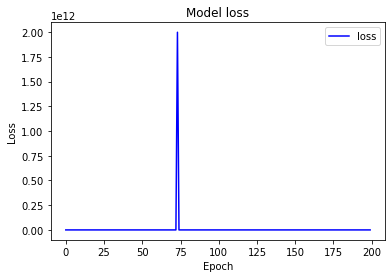

In [303]:
plt.plot(history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 모델 불안정하다 문제 -> 24 step을 잡아서 햇기 때문에 불안정하다.

In [279]:
# 우리가 만들 Autoencoder는 4개의 fully connected layer로 만들어져 있으며, 각 layer는 14, 7, 7, 29개의 뉴런으로 구성
# 두 개의 layer들은 encoder로 쓰이며, 뒤의 두 개는 decoder가 됩니다. 또, L1 정규화(regularization)를 사용

#input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(timestep, inputx.shape[1]))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(inputx.shape[1], activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [351]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

In [455]:

def LSTMModel(train, valid, n_features):
    inputs = Input(shape = (timestep, n_features))
    lstm = Sequential()
    # Encoder
    lstm.add(LSTM(32, activation='relu', input_shape=(timestep, n_features), return_sequences=True))
    lstm.add(LSTM(16, activation='relu', return_sequences=False))
    lstm.add(RepeatVector(timestep))
    # Decoder
    lstm.add(LSTM(16, activation='relu', return_sequences=True))
    lstm.add(LSTM(32, activation='relu', return_sequences=True))
    lstm.add(TimeDistributed(Dense(n_features)))
    
    # fit # x_train_y0_scaled, x_valid_y0_scaled
    return lstm


In [327]:
lstm = LSTMModel(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])



In [328]:
lstm.summary()
# compile
lstm.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
    

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 24, 32)            4864      
_________________________________________________________________
lstm_57 (LSTM)               (None, 16)                3136      
_________________________________________________________________
repeat_vector_15 (RepeatVect (None, 24, 16)            0         
_________________________________________________________________
lstm_58 (LSTM)               (None, 24, 16)            2112      
_________________________________________________________________
lstm_59 (LSTM)               (None, 24, 32)            6272      
_________________________________________________________________
time_distributed_12 (TimeDis (None, 24, 5)             165       
Total params: 16,549
Trainable params: 16,549
Non-trainable params: 0
__________________________________________________

In [329]:
epochs = 100
batchsize = 64
history = lstm.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1)
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list type floating

Epoch 1/100
402/402 [==============================] - 14s 23ms/step - loss: 0.8659 - accuracy: 0.3032 - val_loss: 46389692999590215680.0000 - val_accuracy: 0.1084
Epoch 2/100
402/402 [==============================] - 8s 21ms/step - loss: 1.4934 - accuracy: 0.3091 - val_loss: 2381314586855866368.0000 - val_accuracy: 0.0347
Epoch 3/100
402/402 [==============================] - 8s 21ms/step - loss: 0.8098 - accuracy: 0.3253 - val_loss: 735943676961751040.0000 - val_accuracy: 0.0623
Epoch 4/100
402/402 [==============================] - 9s 21ms/step - loss: 0.8423 - accuracy: 0.3311 - val_loss: 54630583845781504.0000 - val_accuracy: 0.0734
Epoch 5/100
402/402 [==============================] - 9s 22ms/step - loss: 0.8490 - accuracy: 0.3297 - val_loss: 152562203336114176.0000 - val_accuracy: 0.2705
Epoch 6/100
402/402 [==============================] - 9s 24ms/step - loss: 0.8221 - accuracy: 0.3375 - val_loss: 269861333602664448.0000 - val_accuracy: 0.2386
Epoch 7/100
402/402 [==========

402/402 [==============================] - 10s 24ms/step - loss: 0.6454 - accuracy: 0.3953 - val_loss: 4893602522071040.0000 - val_accuracy: 0.1175
Epoch 52/100
402/402 [==============================] - 10s 24ms/step - loss: 0.6345 - accuracy: 0.3966 - val_loss: 1861668069965824.0000 - val_accuracy: 0.1044
Epoch 53/100
402/402 [==============================] - 9s 23ms/step - loss: 0.6352 - accuracy: 0.3965 - val_loss: 1510082718203904.0000 - val_accuracy: 0.1348
Epoch 54/100
402/402 [==============================] - 10s 24ms/step - loss: 0.6285 - accuracy: 0.3974 - val_loss: 906547269992448.0000 - val_accuracy: 0.1598
Epoch 55/100
402/402 [==============================] - 10s 24ms/step - loss: 0.6288 - accuracy: 0.3978 - val_loss: 1385321166012416.0000 - val_accuracy: 0.1463
Epoch 56/100
402/402 [==============================] - 10s 25ms/step - loss: 0.6212 - accuracy: 0.3992 - val_loss: 1363241007579136.0000 - val_accuracy: 0.1815
Epoch 57/100
402/402 [===========================

In [344]:
# 
timestep = 5 # 5시간 전 예측하기...
#
data5x, data5y = transformlization(inputx, inputy, timestep) 




=======완료======


In [345]:
trainx, testx, trainy, testy = train_test_split(data5x, data5y, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)

In [346]:
print(len(trainx))  # 
print(len(validx))
print(len(testx))

39712
9929
21275


In [347]:
trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]

In [350]:
def flatten(data):
    # 데이터 3차원으로 변경
    #data = np.array(data).reshape(data.shape[0], 1, data.shape[1])
    flattened_X = np.empty((data.shape[0], data.shape[2]))  # sample x features array.
    for i in range(data.shape[0]):
        flattened_X[i] = data[i, (data.shape[2]-1), :]
    return(flattened_X)

def scale(data, scaler):
    for i in range(data.shape[0]):
        data[i, :, :] = scaler.transform(data[i, :, :])
        
    return data

In [353]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

In [451]:
def autoencoder_model(train, valid, n_features, epochs, batchsize, lr):
    inputs = Input(shape = (timestep, n_features))
    
    # encoder #
    L1 = LSTM(96, activation = 'relu', return_sequences = True, 
             kernel_regularizer = regularizers.l2(10e-5))(inputs)
    L2 = LSTM(48, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(timestep)(L2)
    # decoder 
    L4 = LSTM(96, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(48, activation = 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(n_features))(L5)
    
    model = Model(inputs = inputs, outputs=output)
    
    return model

In [452]:

model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1], 200, 64, 0.01)
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 4, 5)]            0         
_________________________________________________________________
lstm_92 (LSTM)               (None, 4, 96)             39168     
_________________________________________________________________
lstm_93 (LSTM)               (None, 48)                27840     
_________________________________________________________________
repeat_vector_24 (RepeatVect (None, 4, 48)             0         
_________________________________________________________________
lstm_94 (LSTM)               (None, 4, 96)             55680     
_________________________________________________________________
lstm_95 (LSTM)               (None, 4, 48)             27840     
_________________________________________________________________
time_distributed_20 (TimeDis (None, 4, 5)              245

In [356]:
epochs = 200
batchsize = 64
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list type floating




Epoch 1/200
402/402 [==============================] - 7s 11ms/step - loss: 0.6021 - accuracy: 0.4401 - val_loss: 0.4611 - val_accuracy: 0.5269
Epoch 2/200
402/402 [==============================] - 4s 9ms/step - loss: 0.3999 - accuracy: 0.5777 - val_loss: 0.3047 - val_accuracy: 0.6494
Epoch 3/200
402/402 [==============================] - 4s 10ms/step - loss: 0.2496 - accuracy: 0.7038 - val_loss: 0.1657 - val_accuracy: 0.7820
Epoch 4/200
402/402 [==============================] - 4s 10ms/step - loss: 0.1433 - accuracy: 0.7952 - val_loss: 0.1156 - val_accuracy: 0.8220
Epoch 5/200
402/402 [==============================] - 4s 11ms/step - loss: 0.0791 - accuracy: 0.8586 - val_loss: 0.0504 - val_accuracy: 0.8821
Epoch 6/200
402/402 [==============================] - 4s 11ms/step - loss: 0.0396 - accuracy: 0.9066 - val_loss: 0.0267 - val_accuracy: 0.9203
Epoch 7/200
402/402 [==============================] - 4s 11ms/step - loss: 0.0251 - accuracy: 0.9230 - val_loss: 0.0268 - val_accuracy: 

402/402 [==============================] - 4s 11ms/step - loss: 0.0019 - accuracy: 0.9715 - val_loss: 0.0018 - val_accuracy: 0.9727
Epoch 58/200
402/402 [==============================] - 4s 11ms/step - loss: 0.0023 - accuracy: 0.9690 - val_loss: 0.0032 - val_accuracy: 0.9618
Epoch 59/200
402/402 [==============================] - 4s 10ms/step - loss: 0.0019 - accuracy: 0.9712 - val_loss: 0.0020 - val_accuracy: 0.9765
Epoch 60/200
402/402 [==============================] - 4s 10ms/step - loss: 0.0018 - accuracy: 0.9724 - val_loss: 0.0017 - val_accuracy: 0.9762
Epoch 61/200
402/402 [==============================] - 4s 10ms/step - loss: 0.0018 - accuracy: 0.9727 - val_loss: 0.0021 - val_accuracy: 0.9713
Epoch 62/200
402/402 [==============================] - 4s 10ms/step - loss: 0.0018 - accuracy: 0.9731 - val_loss: 0.0015 - val_accuracy: 0.9796
Epoch 63/200
402/402 [==============================] - 4s 10ms/step - loss: 0.0018 - accuracy: 0.9723 - val_loss: 0.0017 - val_accuracy: 0.975

402/402 [==============================] - 4s 11ms/step - loss: 0.0011 - accuracy: 0.9790 - val_loss: 0.0011 - val_accuracy: 0.9817
Epoch 114/200
402/402 [==============================] - 4s 11ms/step - loss: 9.7126e-04 - accuracy: 0.9799 - val_loss: 0.0026 - val_accuracy: 0.9704
Epoch 115/200
402/402 [==============================] - 5s 12ms/step - loss: 0.0020 - accuracy: 0.9742 - val_loss: 8.7770e-04 - val_accuracy: 0.9859
Epoch 116/200
402/402 [==============================] - 5s 11ms/step - loss: 9.3611e-04 - accuracy: 0.9820 - val_loss: 9.3758e-04 - val_accuracy: 0.9756
Epoch 117/200
402/402 [==============================] - 5s 12ms/step - loss: 8.3124e-04 - accuracy: 0.9821 - val_loss: 0.0013 - val_accuracy: 0.9740
Epoch 118/200
402/402 [==============================] - 5s 13ms/step - loss: 8.6212e-04 - accuracy: 0.9818 - val_loss: 8.5596e-04 - val_accuracy: 0.9819
Epoch 119/200
402/402 [==============================] - 4s 11ms/step - loss: 8.5195e-04 - accuracy: 0.9816 - 

Epoch 167/200
402/402 [==============================] - 4s 10ms/step - loss: 7.2161e-04 - accuracy: 0.9831 - val_loss: 0.0010 - val_accuracy: 0.9836
Epoch 168/200
402/402 [==============================] - 4s 10ms/step - loss: 7.3936e-04 - accuracy: 0.9829 - val_loss: 5.5036e-04 - val_accuracy: 0.9824
Epoch 169/200
402/402 [==============================] - 4s 10ms/step - loss: 6.7312e-04 - accuracy: 0.9842 - val_loss: 9.5210e-04 - val_accuracy: 0.9792
Epoch 170/200
402/402 [==============================] - 4s 10ms/step - loss: 8.2761e-04 - accuracy: 0.9819 - val_loss: 7.7132e-04 - val_accuracy: 0.9801
Epoch 171/200
402/402 [==============================] - 4s 10ms/step - loss: 6.0454e-04 - accuracy: 0.9854 - val_loss: 5.8121e-04 - val_accuracy: 0.9861
Epoch 172/200
402/402 [==============================] - 4s 10ms/step - loss: 6.3379e-04 - accuracy: 0.9841 - val_loss: 6.4320e-04 - val_accuracy: 0.9832
Epoch 173/200
402/402 [==============================] - 4s 11ms/step - loss: 6.

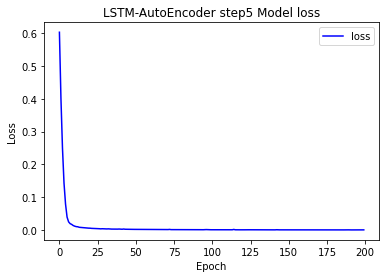

In [358]:
plt.plot(history['loss'], 'b-', label='loss')
plt.title('LSTM-AutoEncoder step5 Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #

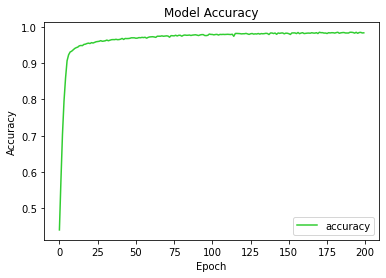

In [360]:
# 모델 정확도 시각화
plt.plot(history['accuracy'], 'limegreen', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

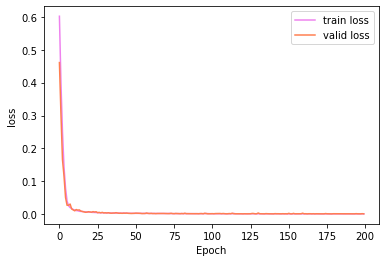

In [363]:
plt.plot(history['loss'], 'violet', label='train loss')
plt.plot(history['val_loss'], 'coral', label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

In [449]:
def ReconstructionError(x, valid_data, y_valid): #x_valid_scaled
    valid_x_predictions = x.predict(valid_data)
    mse = np.mean(np.power(flatten(valid_data) - flatten(valid_x_predictions), 2), axis=1)
    error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': sum(validy.tolist(), [])})
    precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], 
                                                                           error_df['Reconstruction_error'])
    
    return precision_rt, recall_rt, threshold_rt


In [391]:
sum(validy.tolist(), [])

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0

In [454]:
valid_x_predictions = model.predict(validx_scaled)
mse = np.mean(np.power(flatten(validx_scaled) - flatten(valid_x_predictions), 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': sum(validy.tolist(), [])})
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

ValueError: in user code:

    /opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_16: expected shape=(None, 4, 5), found shape=(None, 10, 5)


In [395]:
error_df

,Reconstruction_error,True_class
0,0.506835,0.0
1,0.246546,0.0
2,2.145193,1.0
3,2.788257,0.0
4,0.273946,0.0
...,...,...
9924,1.194619,0.0
9925,0.778568,0.0
9926,1.397619,0.0
9927,0.571267,1.0


In [396]:
precision_rt, recall_rt, threshold_rt = ReconstructionError(lstm, validx_scaled, validy)


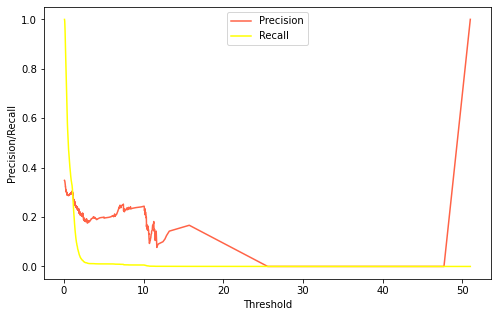

In [397]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], 'tomato', label='Precision')
plt.plot(threshold_rt, recall_rt[1:], 'yellow', label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
def bestThresholdfind():
    index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
    print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])



In [398]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

precision:  0.2953757225433526 , recall:  0.2953757225433526
threshold:  1.0843630848865795


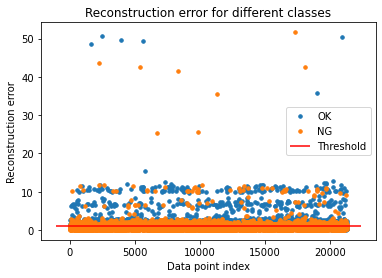

In [402]:
test_x_predictions = lstm.predict(testx_scaled)
mse = np.mean(np.power(flatten(testx_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': sum(testy.tolist(), [])})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "NG" if name == 1 else "OK")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

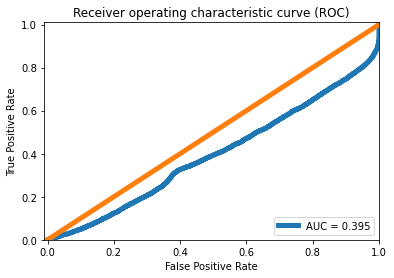

In [404]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [428]:
# 
timestep = 10 # 10시간 전 예측하기...
#
data2x, data2y = transformlization(inputx, inputy, timestep) 


=======완료======


In [429]:
trainx, testx, trainy, testy = train_test_split(data2x, data2y, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)

In [430]:
print(len(trainx))  # 
print(len(validx))
print(len(testx))

39709
9928
21274


In [431]:
trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]

In [432]:
def flatten(data):
    # 데이터 3차원으로 변경
    #data = np.array(data).reshape(data.shape[0], 1, data.shape[1])
    flattened_X = np.empty((data.shape[0], data.shape[2]))  # sample x features array.
    for i in range(data.shape[0]):
        flattened_X[i] = data[i, (data.shape[2]-1), :]
    return(flattened_X)

def scale(data, scaler):
    for i in range(data.shape[0]):
        data[i, :, :] = scaler.transform(data[i, :, :])
        
    return data

In [433]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

In [413]:
inputx.shape[1]

5

In [434]:
def autoencoder_model(train, valid, timestep, n_features, epochs, batchsize, lr):
    inputs = Input(shape = (timestep, n_features))
    
    # encoder #
    L1 = LSTM(96, activation = 'relu', return_sequences = True, 
             kernel_regularizer = regularizers.l2(10e-5))(inputs)
    L2 = LSTM(48, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(timestep)(L2)
    # decoder 
    L4 = LSTM(96, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(48, activation = 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(n_features))(L5)
    
    model = Model(inputs = inputs, outputs=output)
    
    return model

In [435]:

model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, 10, inputx.shape[1], 200, 64, 0.01)
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 10, 5)]           0         
_________________________________________________________________
lstm_88 (LSTM)               (None, 10, 96)            39168     
_________________________________________________________________
lstm_89 (LSTM)               (None, 48)                27840     
_________________________________________________________________
repeat_vector_23 (RepeatVect (None, 10, 48)            0         
_________________________________________________________________
lstm_90 (LSTM)               (None, 10, 96)            55680     
_________________________________________________________________
lstm_91 (LSTM)               (None, 10, 48)            27840     
_________________________________________________________________
time_distributed_19 (TimeDis (None, 10, 5)             245

In [436]:
epochs = 200
batchsize = 64
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list type floating




Epoch 1/200
401/401 [==============================] - 10s 18ms/step - loss: 16.2465 - accuracy: 0.3438 - val_loss: 0.8627 - val_accuracy: 0.3736
Epoch 2/200
401/401 [==============================] - 8s 20ms/step - loss: 0.8440 - accuracy: 0.3847 - val_loss: 0.8655 - val_accuracy: 0.3924
Epoch 3/200
401/401 [==============================] - 10s 24ms/step - loss: 0.8109 - accuracy: 0.4027 - val_loss: 0.7932 - val_accuracy: 0.4231
Epoch 4/200
401/401 [==============================] - 8s 20ms/step - loss: 0.7326 - accuracy: 0.4288 - val_loss: 0.7339 - val_accuracy: 0.4366
Epoch 5/200
401/401 [==============================] - 8s 19ms/step - loss: 0.7113 - accuracy: 0.4376 - val_loss: 0.6857 - val_accuracy: 0.4483
Epoch 6/200
401/401 [==============================] - 7s 18ms/step - loss: 0.6495 - accuracy: 0.4518 - val_loss: 0.6219 - val_accuracy: 0.4692
Epoch 7/200
401/401 [==============================] - 7s 18ms/step - loss: 0.6039 - accuracy: 0.4776 - val_loss: 0.6193 - val_accura

401/401 [==============================] - 7s 16ms/step - loss: 0.2083 - accuracy: 0.8031 - val_loss: 0.1919 - val_accuracy: 0.8376
Epoch 58/200
401/401 [==============================] - 7s 16ms/step - loss: 0.1265 - accuracy: 0.8422 - val_loss: 0.1215 - val_accuracy: 0.8468
Epoch 59/200
401/401 [==============================] - 7s 16ms/step - loss: 0.1125 - accuracy: 0.8480 - val_loss: 0.1065 - val_accuracy: 0.8538
Epoch 60/200
401/401 [==============================] - 7s 16ms/step - loss: 0.1198 - accuracy: 0.8506 - val_loss: 0.1161 - val_accuracy: 0.8556
Epoch 61/200
401/401 [==============================] - 7s 17ms/step - loss: 0.0889 - accuracy: 0.8618 - val_loss: 0.1413 - val_accuracy: 0.8646
Epoch 62/200
401/401 [==============================] - 7s 16ms/step - loss: 0.0912 - accuracy: 0.8715 - val_loss: 0.1208 - val_accuracy: 0.8620
Epoch 63/200
401/401 [==============================] - 7s 17ms/step - loss: 0.0806 - accuracy: 0.8780 - val_loss: 0.1112 - val_accuracy: 0.854

KeyboardInterrupt: 

In [437]:
# 
timestep = 4 # 4시간 전 예측하기...
#
data4x, data4y = transformlization(inputx, inputy, timestep) 

=======완료======


In [438]:
trainx, testx, trainy, testy = train_test_split(data4x, data4y, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)

In [439]:
trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]

In [444]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

IndexError: index 4 is out of bounds for axis 1 with size 4

In [447]:
newdata

,Unnamed: 0,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,1,2020-03-04 0:01,14,740,1740,590,3.22,0
1,2,2020-03-04 0:02,24,740,1748,575,3.22,0
2,3,2020-03-04 0:03,34,759,1718,560,3.21,0
3,4,2020-03-04 0:04,44,757,1737,546,3.22,0
4,5,2020-03-04 0:05,54,797,1739,531,3.21,0
...,...,...,...,...,...,...,...,...
76313,76314,2020-04-30 23:54,835144,784,1751,387,3.22,0
76314,76315,2020-04-30 23:55,835154,740,1748,373,3.22,0
76315,76316,2020-04-30 23:57,835174,728,1737,344,3.21,0
76316,76317,2020-04-30 23:58,835184,755,1715,330,3.22,0


In [330]:
plt.plot(history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 모델 불안정하다 문제 -> 24 step을 잡아서 햇기 때문에 불안정하다.

TypeError: 'History' object is not subscriptable

In [44]:

shifted_df = curve_shift(newsdata, 'TAG', shiftby=-60) # 60 # 1시간
shifted_df.head()

,TAG,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,0.0,2020-03-04 0:01,14,740,1740,590,3.22
1,0.0,2020-03-04 0:02,24,740,1748,575,3.22
2,0.0,2020-03-04 0:03,34,759,1718,560,3.21
3,0.0,2020-03-04 0:04,44,757,1737,546,3.22
4,0.0,2020-03-04 0:05,54,797,1739,531,3.21


In [45]:
shifted_df.shape

(76318, 7)

In [47]:
shifted_df[shifted_df['TAG'] == 0]

,TAG,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,0.0,2020-03-04 0:01,14,740,1740,590,3.22
1,0.0,2020-03-04 0:02,24,740,1748,575,3.22
2,0.0,2020-03-04 0:03,34,759,1718,560,3.21
3,0.0,2020-03-04 0:04,44,757,1737,546,3.22
4,0.0,2020-03-04 0:05,54,797,1739,531,3.21
...,...,...,...,...,...,...,...
76313,0.0,2020-04-30 23:54,835144,784,1751,387,3.22
76314,0.0,2020-04-30 23:55,835154,740,1748,373,3.22
76315,0.0,2020-04-30 23:57,835174,728,1737,344,3.21
76316,0.0,2020-04-30 23:58,835184,755,1715,330,3.22
